<div style="display:block" direction=rtl align=right><br><br>
    <div  style="width:100%;margin:100;display:block"  display=block align=center>
        <img width=130 align=right src="https://i.ibb.co/yXKQmtZ/logo1.png" style="margin:0;" />
        <img width=170 align=left  src="https://i.ibb.co/wLjqFkw/logo2.png" style="margin:0;" />
        <span><br><font size=5>University of Tehran , school of ECE</font></span>
        <span><br><font size=3>Data Analytics Course</font></span>
        <span><br><font size=3>Fall 2022</font></span>
    </div><br><br><br>
    <div style="display:block" align=left display=block> 
        <font size=3>Homework 2</font><br>
        <hr />
        <font size=3>TA: <a href="mailto:mersad.esalati@gmail.com">Mersad Esalati</a><br></font><br>
    </div>
</div>

# Beatifulsoup

## News Crawler
News Information:
- Title
- Description
- datetime
- Category
- Agency

In [4]:
# parse news list page

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from bs4 import BeautifulSoup as bs

### Currency News Crawler

In [6]:
# crawl data + save into csv file

In [7]:
page = 1
currency_news = {'title':[], 'description':[], 'datetime':[], 'category':[], 'agency':[]}
size = 0
while size < 500:
    url = f"https://www.tgju.org/news/category/93965/%D8%A7%D8%AE%D8%A8%D8%A7%D8%B1-%D8%A7%D8%B1%D8%B2%DB%8C/page/{page}"
    response = requests.get(url)
    soup = bs(response.text, 'html.parser')
    lists = soup.select('div.news-article-block')
    for item in lists:
        size += 1
        currency_news['title'].append(item.div.h2.a.text)
        currency_news['category'].append(item.select('.news-article-tag')[0].text)
        
        description = item.select_one('span.news-article-description').text
        description = description.strip()
        currency_news['description'].append(description)
        currency_news['datetime'].append(item.div.time['datetime'])
        currency_news['agency'].append(item.select('.news-article-tag')[1].text)
    page = page + 1

In [8]:
df_currency = pd.DataFrame(currency_news)
df_currency.to_csv('CURRENCY_NEWS.csv', encoding='utf-8-sig')

### Gold News Crawler

In [9]:
# crawl data + save into csv file

In [10]:
page = 1
gold_news = {'title':[], 'description':[], 'datetime':[], 'category':[], 'agency':[]}
size = 0
while size < 500:
    url = f"https://www.tgju.org/news/category/93964/%D8%A7%D8%AE%D8%A8%D8%A7%D8%B1-%D8%B7%D9%84%D8%A7-%D9%88-%D8%B3%DA%A9%D9%87/page/{page}"
    response = requests.get(url)
    soup = bs(response.text, 'html.parser')
    lists = soup.select('div.news-article-block')
    for item in lists:
        size += 1
        gold_news['title'].append(item.div.h2.a.text)
        gold_news['category'].append(item.select('.news-article-tag')[0].text)
        
        description = item.select_one('span.news-article-description').text
        description = description.strip()
        gold_news['description'].append(description)
        gold_news['datetime'].append(item.div.time['datetime'])
        gold_news['agency'].append(item.select('.news-article-tag')[1].text)
    page = page + 1

In [11]:
df_gold = pd.DataFrame(gold_news)
df_gold.to_csv('GOLD_NEWS.csv', encoding='utf-8-sig')

## Question 1: Top Agency

First I concated two dataframes I've created:

In [12]:
df = pd.concat([df_currency, df_gold]).reset_index()

Here I helped from this [link](https://stackoverflow.com/questions/27842613/pandas-groupby-then-sort-within-groups) 

In [13]:
df2 = df.groupby(['category', 'agency']).count()
df2['count'] = df2['index']
g = df2.groupby('category', group_keys=False)
res = g.apply(lambda x: x.sort_values(by='count', ascending=False).head(5))
res

index  title  description  datetime  count
category        agency                                                     
اخبار ارزی      اقتصاد نیوز         48     48           48        48     48
                دنیای اقتصاد        45     45           45        45     45
                ایران اکونومیست     38     38           38        38     38
                دیجی کالا مگ        37     37           37        37     37
                اقتصاد آنلاین       34     34           34        34     34
اخبار طلا و سکه نبض بازار           94     94           94        94     94
                اقتصاد نیوز         70     70           70        70     70
                سایت طلا            63     63           63        63     63
                اقتصاد آنلاین       49     49           49        49     49
                اخبار ویژه          46     46           46        46     46

## Question 2: Daily News Trend

First we need to be sure that datetime column has datetime type.

In [14]:
df_currency['datetime'] = pd.to_datetime(df_currency['datetime'])
df_gold['datetime'] = pd.to_datetime(df_gold['datetime'])

For each dataframe, first grouping by date of datetime column and apply count method.

Then plot them in separated line plot but in one  

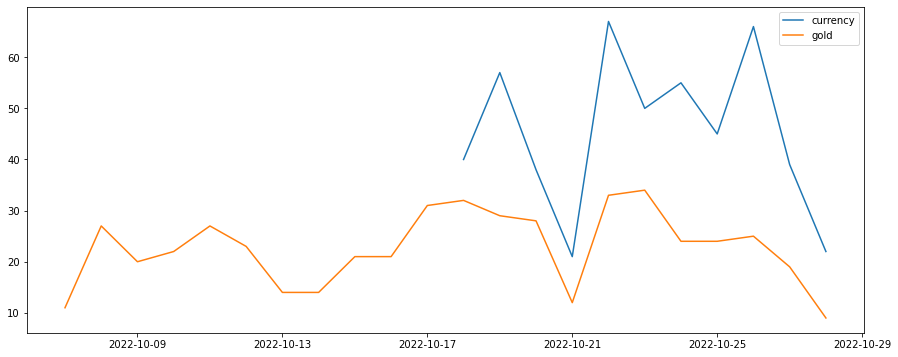

In [15]:
g1 = df_currency.groupby([df_currency['datetime'].dt.date]).count()
g1['count'] = g1['title']
g1 = pd.DataFrame(g1['title'])
plt.figure(figsize=(15, 6))
plt.plot(g1)

g2 = df_gold.groupby([df_gold['datetime'].dt.date]).count()
g2['count'] = g2['title']
g2 = pd.DataFrame(g2['title'])
plt.plot(g2)

plt.legend(['currency', 'gold'])